In [8]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn, cuda
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
from torch.utils.data import DataLoader
from skimage import io
from torch.utils.data import Dataset
from torch.optim import Adam

In [178]:
# df_men_train =pd.read_csv( r"C:\Users\busse\Bachelorarbeit\CICD-Pipeline-Gender-Recognition\model\excel_sheets\git_image_paths_val_men.csv")
# df_men_train["Images"] = df_men_train["Images"].str.replace("C:/Users/busse/Bachelorarbeit/CICD-Pipeline-Gender-Recognition/", " ")
# df_men_train.to_csv(r"C:\Users\busse\Bachelorarbeit\CICD-Pipeline-Gender-Recognition\model\excel_sheets\git_image_paths_val_men.csv")


In [10]:


epochs = 100
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
img_dir_train ='C:/Users/busse/Bachelorarbeit/CICD-Pipeline-Gender-Recognition/data/train'
img_dir_val = 'C:/Users/busse/Bachelorarbeit/CICD-Pipeline-Gender-Recognition/data/val'
train_dataset = datasets.ImageFolder(root=img_dir_train,transform=transform)
test_dataset = datasets.ImageFolder(root= img_dir_val,transform=transform)
# Apply the transformation to your dataset
# train_dataset = datasets.ImageFolder(root='data/train',transform=transform)
# test_dataset = datasets.ImageFolder(root= 'data/val',transform=transform)
# df_men_train = pd.read_csv("model/excel_sheets/git_image_paths_men.csv")
# df_women_train = pd.read_csv("model/excel_sheets/git_image_paths_women.csv")
# df_women_test = pd.read_csv("model/excel_sheets/git_image_paths_val_women.csv")
# df_men_test = pd.read_csv("model/excel_sheets/git_image_paths_val_men.csv")
# merged_df_train = pd.concat([df_men_train, df_women_train], ignore_index=True)
# merged_df_test = pd.concat([df_men_test, df_women_test], ignore_index=True)
# merged_df_test.to_csv("model/git_merged_df_test.csv")
# merged_df_train.to_csv("model/git_merged_df_train.csv")

In [16]:
import torchvision


class CustomImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 1])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[idx, 2]))
        if self.transform:
            image = self.transform(image)
        return (image,y_label)


# train_data = CustomImageDataset(annotations_file='model/git_merged_df_train.csv',img_dir='data/train')
# test_data =  CustomImageDataset(annotations_file='model/git_merged_df_test.csv',img_dir='data/val')

dataset = CustomImageDataset(csv_file='C:/Users/busse/Bachelorarbeit/CICD-Pipeline-Gender-Recognition/model/csv_sheets/merged_df_train.csv',img_dir='C:/Users/busse/Bachelorarbeit/CICD-Pipeline-Gender-Recognition/data/train',transform=transforms.ToTensor())
# test_data =  CustomImageDataset(csv_file='C:/Users/busse/Bachelorarbeit/CICD-Pipeline-Gender-Recognition/model/csv_sheets/merged_df_test.csv',img_dir='C:/Users/busse/Bachelorarbeit/CICD-Pipeline-Gender-Recognition/data/val', transform=transforms.ToTensor())
train_set, test_set = torch.utils.data.random_split(dataset,[3000,1000])
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True) 


device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torchvision.models.googlenet(pretrained=True)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001) 

for epoch in range(epochs):
    losses = []
    for batch_indx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)
        # Get to correct shape
        # data = data.reshape(data.shape[0], -1)
        # forward
        scores = model(data)
        loss = criterion(scores, targets)
        losses.append(loss.item())
        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()















c:\Users\busse\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\busse\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [181]:


train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([64, 3, 218, 178])
Labels batch shape: torch.Size([64])


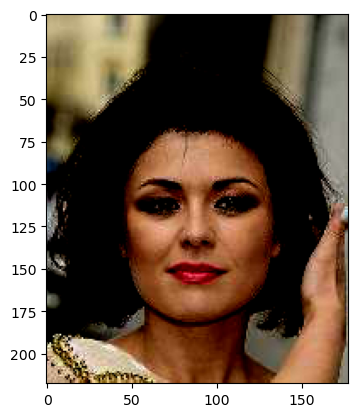

In [182]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
img = train_features[0].permute(1, 2, 0)
plt.imshow(img, cmap="gray")

In [183]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Erste Convolutional Layer. Nimmt 3 Eingangskanäle (RGB), gibt 6 Kanäle aus, mit einer Kernelgröße von 5
        self.conv1 = nn.Conv2d(3, 6, 5)  
        # Max-Pooling-Layer mit einem quadratischen Fenster der Kernelgröße=4, Schrittgröße=4
        self.pool = nn.MaxPool2d(4, 4)  
        # Zweite Convolutional Layer. Nimmt 6 Eingangskanäle (von der vorherigen Schicht), gibt 16 Kanäle aus, mit einer Kernelgröße von 5
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Max-Pooling-Layer mit einem quadratischen Fenster der Kernelgröße=2, Schrittgröße=2
        self.pool = nn.MaxPool2d(2,2) 
        # Erste vollständig verbundene Schicht. Nimmt einen abgeflachten Vektor der Größe 33456 auf, gibt einen Vektor der Größe 120 aus
        self.fc1 = nn.Linear(33456 , 120) 
        # Zweite vollständig verbundene Schicht. Nimmt einen Vektor der Größe 120 auf, gibt einen Vektor der Größe 84 aus
        self.fc2 = nn.Linear(120, 84)
        # Dritte vollständig verbundene Schicht. Nimmt einen Vektor der Größe 84 auf, gibt einen Vektor der Größe 2 aus
        self.fc3 = nn.Linear(84, 2) 

    def forward(self, x):
        # Anwendung der ersten Conv-Schicht, dann ReLU-Aktivierungsfunktion, dann Max-Pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Anwendung der zweiten Conv-Schicht, dann ReLU-Aktivierungsfunktion, dann Max-Pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Abflachen des Tensorausgangs von den Conv-Schichten
        x = x.view(x.size(0), -1) 
        # Anwendung der ersten vollständig verbundenen Schicht, dann ReLU-Aktivierungsfunktion
        x = F.relu(self.fc1(x))  
        # Anwendung der zweiten vollständig verbundenen Schicht, dann ReLU-Aktivierungsfunktion
        x = F.relu(self.fc2(x)) 
        # Anwendung der dritten vollständig verbundenen Schicht
        x = self.fc3(x)  
        return x

In [184]:
import torch.optim as optim
from tqdm import tqdm

# Instantiate the model, loss function and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Assume `val_dataloader` is your DataLoader for the validation set
# for epoch in range(epochs):  # loop over the dataset multiple times
#     running_loss = 0.0
#     for i, data in enumerate(tqdm(train_dataloader), 0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()  
         

#         # Trainingsverlauf ausgeben
#         running_loss += loss.item()

#         #Alle 10 Batches wird der Loss ausgegeben
#         if i % 10 == 9:    
#             # Berechnung der Accuracy
#             correct = 0
#             total = 0
#             with torch.no_grad():
#                 for val_data in test_dataloader:
#                     val_images, val_labels = val_data
#                     val_outputs = model(val_images)
#                     _, predicted = torch.max(val_outputs.data, 1)
#                     total += val_labels.size(0)
#                     correct += (predicted == val_labels).sum().item()
#             val_accuracy = correct / total

#             print(f'Epoch: {epoch + 1}, Batch: {i + 1}, Loss: {running_loss / 10}, Validation Accuracy: {val_accuracy * 100}%')
#             running_loss = 0.0

# print('Finished Training')


for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(tqdm(train_dataloader), 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()  

        # Trainingsverlauf ausgeben
        running_loss += loss.item()

        #Alle 10 Batches wird der Loss ausgegeben
        if i % 10 == 9:    
            # Berechnung der Accuracy
            correct = 0
            total = 0
            with torch.no_grad():
                for val_data in test_dataloader:
                    val_images, val_labels = val_data
                    val_outputs = model(val_images)
                    _, predicted = torch.max(val_outputs.data, 1)
                    total += val_labels.size(0)
                    correct += (predicted == val_labels).sum().item()
            val_accuracy = correct / total

            print(f'Epoch: {epoch + 1}, Batch: {i + 1}, Loss: {running_loss / 10}, Validation Accuracy: {val_accuracy * 100}%')
            running_loss = 0.0

            # Wenn die Validation Accuracy 95% erreicht, wird das Training beendet
            if val_accuracy >= 0.95:
                print('Early stopping, validation accuracy reached 95%')
                break

print('Finished Training')

 17%|█▋        | 11/63 [00:05<00:50,  1.03it/s]

Epoch: 1, Batch: 10, Loss: 0.692874139547348, Validation Accuracy: 50.0%


 33%|███▎      | 21/63 [00:11<00:40,  1.04it/s]

Epoch: 1, Batch: 20, Loss: 0.6914516031742096, Validation Accuracy: 51.7%


 49%|████▉     | 31/63 [00:16<00:30,  1.04it/s]

Epoch: 1, Batch: 30, Loss: 0.6877003967761993, Validation Accuracy: 60.5%


 65%|██████▌   | 41/63 [00:22<00:21,  1.01it/s]

Epoch: 1, Batch: 40, Loss: 0.6842960476875305, Validation Accuracy: 66.5%


 81%|████████  | 51/63 [00:27<00:12,  1.00s/it]

Epoch: 1, Batch: 50, Loss: 0.6771084487438201, Validation Accuracy: 67.35%


 97%|█████████▋| 61/63 [00:33<00:01,  1.02it/s]

Epoch: 1, Batch: 60, Loss: 0.6779433608055114, Validation Accuracy: 66.5%


 17%|█▋        | 11/63 [00:05<00:50,  1.02it/s]

Epoch: 2, Batch: 10, Loss: 0.6616616427898407, Validation Accuracy: 67.30000000000001%


 32%|███▏      | 20/63 [00:11<00:57,  1.33s/it]

Epoch: 2, Batch: 20, Loss: 0.6563070595264435, Validation Accuracy: 66.95%


 49%|████▉     | 31/63 [00:16<00:31,  1.03it/s]

Epoch: 2, Batch: 30, Loss: 0.6445665895938874, Validation Accuracy: 67.4%


 65%|██████▌   | 41/63 [00:22<00:21,  1.02it/s]

Epoch: 2, Batch: 40, Loss: 0.6110899150371552, Validation Accuracy: 67.05%


 81%|████████  | 51/63 [00:27<00:11,  1.01it/s]

Epoch: 2, Batch: 50, Loss: 0.6039876461029052, Validation Accuracy: 68.60000000000001%


 97%|█████████▋| 61/63 [00:33<00:02,  1.01s/it]

Epoch: 2, Batch: 60, Loss: 0.6133480727672577, Validation Accuracy: 67.30000000000001%


 17%|█▋        | 11/63 [00:05<00:53,  1.04s/it]

Epoch: 3, Batch: 10, Loss: 0.5685334414243698, Validation Accuracy: 70.05%


 33%|███▎      | 21/63 [00:12<00:50,  1.20s/it]

Epoch: 3, Batch: 20, Loss: 0.5305396974086761, Validation Accuracy: 72.1%


 48%|████▊     | 30/63 [00:18<00:49,  1.51s/it]

Epoch: 3, Batch: 30, Loss: 0.5466005653142929, Validation Accuracy: 73.3%


 63%|██████▎   | 40/63 [00:25<00:38,  1.67s/it]

Epoch: 3, Batch: 40, Loss: 0.510635444521904, Validation Accuracy: 73.85000000000001%


 81%|████████  | 51/63 [00:31<00:13,  1.13s/it]

Epoch: 3, Batch: 50, Loss: 0.5338570237159729, Validation Accuracy: 75.6%


 97%|█████████▋| 61/63 [00:37<00:02,  1.10s/it]

Epoch: 3, Batch: 60, Loss: 0.5283427119255066, Validation Accuracy: 76.44999999999999%


 17%|█▋        | 11/63 [00:06<00:54,  1.05s/it]

Epoch: 4, Batch: 10, Loss: 0.497024142742157, Validation Accuracy: 75.64999999999999%


 33%|███▎      | 21/63 [00:12<00:47,  1.14s/it]

Epoch: 4, Batch: 20, Loss: 0.4931554436683655, Validation Accuracy: 70.55%


 49%|████▉     | 31/63 [00:18<00:31,  1.01it/s]

Epoch: 4, Batch: 30, Loss: 0.4825508952140808, Validation Accuracy: 76.25%


 65%|██████▌   | 41/63 [00:23<00:21,  1.02it/s]

Epoch: 4, Batch: 40, Loss: 0.4708119362592697, Validation Accuracy: 77.35%


 81%|████████  | 51/63 [00:29<00:12,  1.00s/it]

Epoch: 4, Batch: 50, Loss: 0.46284585893154145, Validation Accuracy: 78.2%


 94%|█████████▎| 59/63 [00:30<00:00,  4.42it/s]

In [ ]:
model_path_local = 'C:/Users/busse/Bachelorarbeit/CICD-Pipeline-Gender-Recognition/'
torch.save(model.state_dict(), f'{model_path_local}model/model{batch_size}' + '-' + f'{epochs}' + '.pth')

# torch.save(model.state_dict(), f'model/model{batch_size}' + '-' + f'{epochs}' + '.pth')


In [ ]:
# model_path = f'model/model{batch_size}' + '-' + f'{epochs}' + '.pth'
model_path = f'{model_path_local}model/model{batch_size}' + '-' + f'{epochs}' + '.pth'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN()
# model.load_state_dict(torch.load(f'model/model{batch_size}' + '-' + f'{epochs}' + '.pth'))
model.load_state_dict(torch.load(model_path))

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for inputs, _ in test_loader:
    inputs = inputs.to(device) 
    output = model(inputs)
    probabilities = torch.nn.functional.softmax(output, dim=1)
    predictions = torch.argmax(probabilities, dim=1)
    predictions_list = predictions.cpu().numpy().tolist()
    print(predictions_list)

In [ ]:
# Load the model
model = SimpleCNN()
# model.load_state_dict(torch.load(f'model/model{batch_size}' + '-' + f'{epochs}' + '.pth'))
model.load_state_dict(torch.load(model_path))
# Assume `test_dataset` is your ImageFolder dataset
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Use the model to make predictions and calculate accuracy
correct = 0
total = 0

for inputs, labels in test_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # Forward pass
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    
    # Update total and correct counts
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct / total
print('Accuracy of the model on the test images: {}%'.format(100 * accuracy))

In [ ]:
# Setze das Modell in den Evaluierungsmodus
model.eval() 
predictions = []
true_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted)
        true_labels.extend(labels)


# Konvertiere die Listen in numpy-Arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Berechne die Metriken
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')

print(f'Genauigkeit: {accuracy}, Präzision: {precision}, Recall: {recall}, F1-Score: {f1}')

with open('metrics.txt', 'w') as outfile:
    outfile.write(f'Modellmetriken: Genauigkeit: {accuracy}, Präzision: {precision}, Recall: {recall}, F1-Score: {f1}')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model.eval()  # Set the model to evaluation mode
predictions = []
labels_list = []
with torch.no_grad():
    for data, labels in test_loader:
        outputs = model(data)
        # Flatten the outputs and convert to numpy array
        predictions.extend(outputs.view(-1).cpu().numpy())
        labels_list.extend(labels.cpu().numpy())

# Flatten the arrays
predictions = np.array(predictions).ravel()
labels_list = np.array(labels_list).ravel()

# Ensure both arrays have the same length
min_length = min(len(predictions), len(labels_list))
predictions = predictions[:min_length]
labels_list = labels_list[:min_length]

predictions = np.array(predictions).ravel()
labels_list = np.array(labels_list).ravel()

# Plot true labels against predictions
# plt.scatter(labels_list,predictions)
plt.scatter(labels_list,predictions)
plt.grid(True)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.xlabel('True Labels',color='blue')
plt.ylabel('Predictions',color='red')
plt.title('True Labels vs Predictions')

plt.savefig("plot_scatter.jpg",dpi=300)
plt.show()


plt.plot([labels_list.min(), labels_list.max()], [predictions.min(), predictions.max()], 'k--', lw=4)
plt.grid(True)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.xlabel('True Labels',color='blue')
plt.ylabel('Predictions',color='red')
plt.title('True Labels vs Predictions')
plt.savefig("plot_plt.jpg",dpi=300)
plt.show()

# Create a 2D histogram from the data
heatmap_data, xedges, yedges = np.histogram2d(labels_list, predictions, bins=50)

# Plot the heatmap
plt.imshow(heatmap_data, origin='lower', cmap='hot', interpolation='nearest')
plt.colorbar(label='Anzahl')
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Heatmap of True Labels vs Predictions')
plt.savefig("heatmap.jpg", dpi=300)
plt.show()